In [25]:
import pandas as pd
import seaborn as sns

from sqlalchemy import engine
from pandasql import sqldf

pysqldf = lambda q: sqldf(q, globals())

In [3]:
df = pd.read_csv("all_seasons.csv")

In [4]:
df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,...,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,...,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23


In [5]:
df.shape

(12844, 22)

In [6]:
df.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,6421.500000,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595
std,3707.887763,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3210.750000,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000
50%,6421.500000,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000
75%,9632.250000,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000
max,12843.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [8]:
df['player_name'].duplicated().sum()

10293

In [9]:
df = df.dropna(subset=['player_name'])

In [10]:
df.shape

(12844, 22)

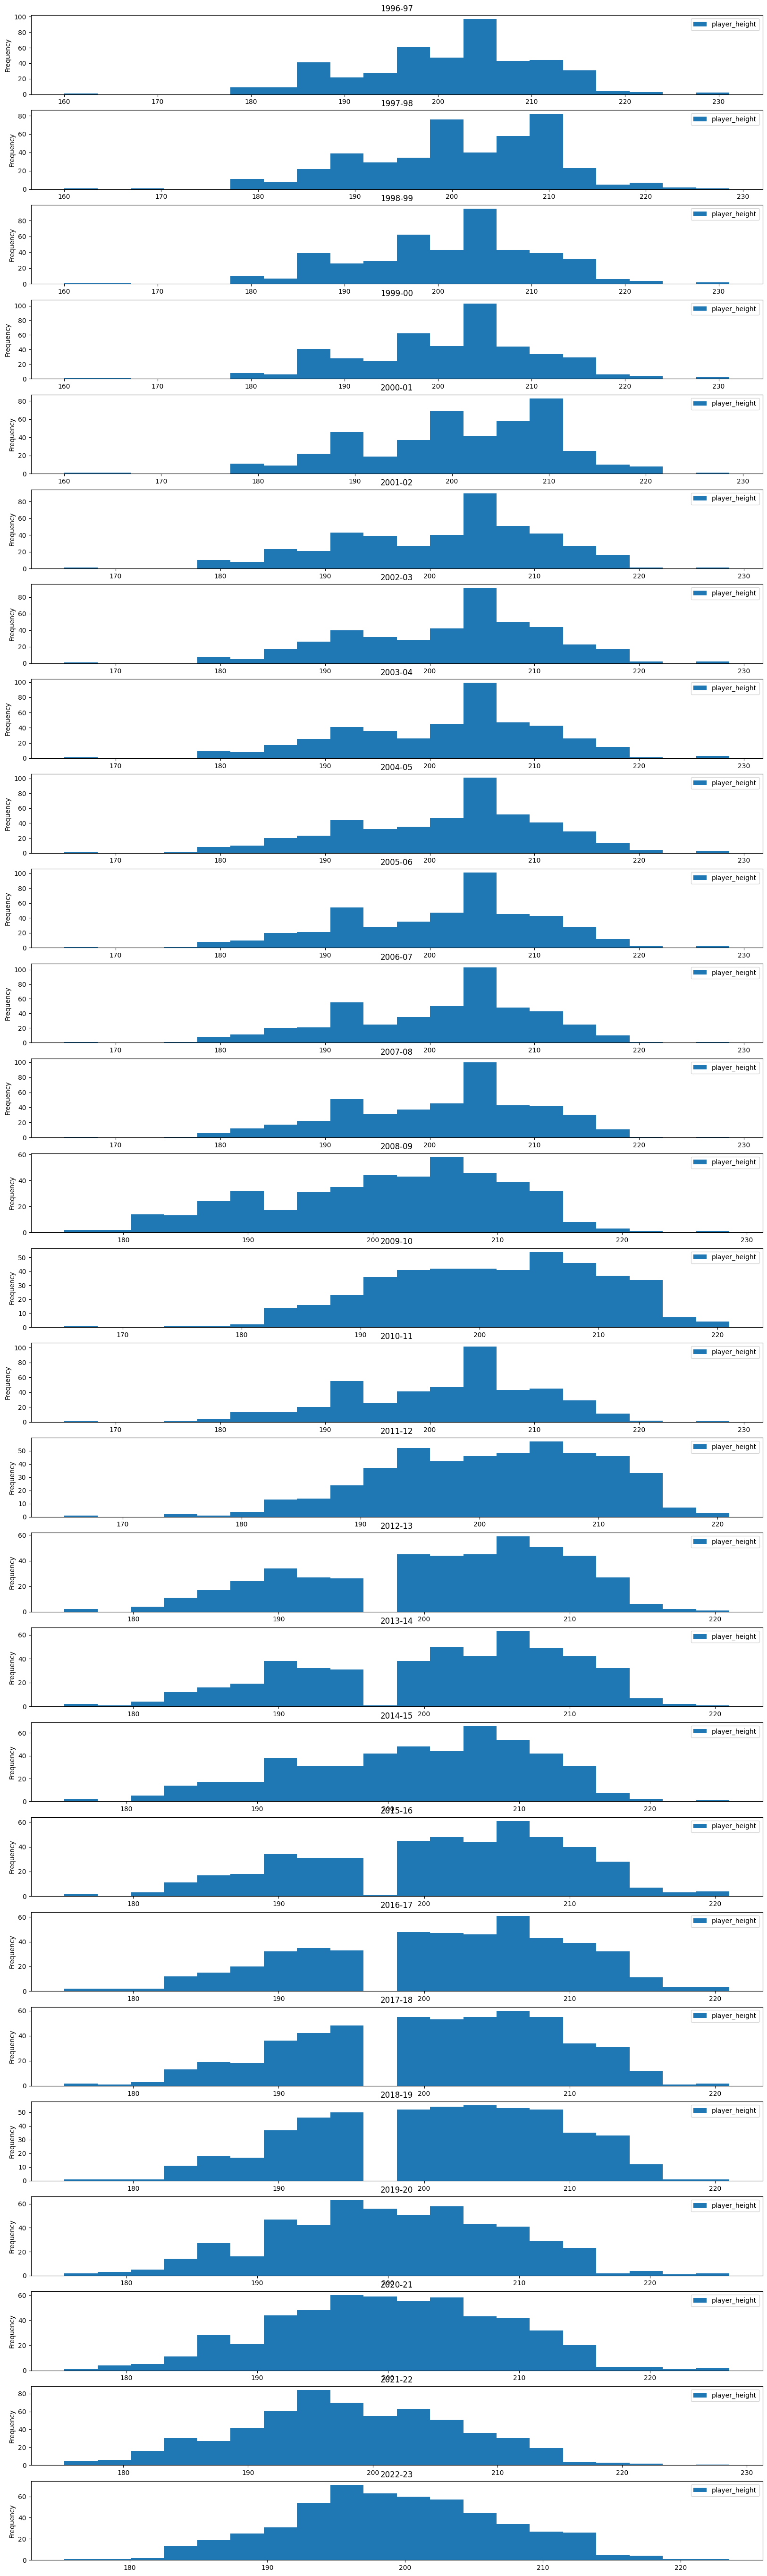

In [19]:
ax = df.plot.hist(column=['player_height'], by='season', bins=20, figsize=(20,70)) 

<Axes: xlabel='age', ylabel='player_height'>

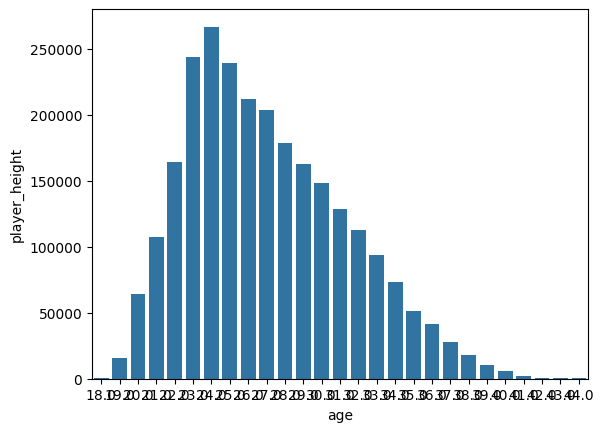

In [23]:
sns.barplot(data=df, x='age', y='player_height', errorbar=None, estimator=sum)

In [38]:
q = """
SELECT
player_name,
pts,
reb,
ast,
season
FROM df
WHERE (pts >= 10)
AND (reb >= 10)
AND (ast >= 10)
"""

df_td = pysqldf(q)


In [39]:
df_td.to_csv("Proyecto NBA Triples Dobles.csv")

In [40]:
df_td

,player_name,pts,reb,ast,season
0,Russell Westbrook,31.6,10.7,10.4,2016-17
1,Russell Westbrook,25.4,10.1,10.3,2017-18
2,Russell Westbrook,22.9,11.1,10.7,2018-19
3,Russell Westbrook,22.2,11.5,11.7,2020-21


In [67]:
q = """
SELECT
player_name,
gp,
pts,
reb,
ast,
draft_round,
season
FROM df
WHERE draft_round = 'Undrafted'
AND (gp >= 1)
"""

df_pu = pysqldf(q)

In [69]:
df_pu

,player_name,gp,pts,reb,ast,draft_round,season
0,Eldridge Recasner,71,5.7,1.6,1.3,Undrafted,1996-97
1,Emanual Davis,13,5.0,1.7,2.0,Undrafted,1996-97
2,Erick Strickland,28,10.6,3.2,2.4,Undrafted,1996-97
3,Evric Gray,5,2.6,0.6,0.4,Undrafted,1996-97
4,Henry James,53,6.7,1.5,0.4,Undrafted,1996-97
...,...,...,...,...,...,...,...
2406,Jay Huff,7,7.3,3.0,1.4,Undrafted,2022-23
2407,Jock Landale,69,6.6,4.1,1.0,Undrafted,2022-23
2408,Joe Ingles,46,6.9,2.8,3.3,Undrafted,2022-23
2409,John Butler Jr.,19,2.4,0.9,0.6,Undrafted,2022-23


In [70]:
df_pu.sort_values(by = ['pts', 'reb', 'ast'], ascending=False)

,player_name,gp,pts,reb,ast,draft_round,season
2021,Christian Wood,41,21.0,9.6,1.7,Undrafted,2020-21
2109,Fred VanVleet,65,20.3,4.4,6.7,Undrafted,2021-22
653,Mike James,79,20.3,3.3,5.8,Undrafted,2005-06
1724,JaKarr Sampson,4,20.0,8.0,1.0,Undrafted,2018-19
2386,Louis King,1,20.0,4.0,2.0,Undrafted,2022-23
...,...,...,...,...,...,...,...
2179,DeJon Jarreau,1,0.0,0.0,0.0,Undrafted,2021-22
2203,Nate Hinton,2,0.0,0.0,0.0,Undrafted,2021-22
2229,Matt Mooney,1,0.0,0.0,0.0,Undrafted,2021-22
2311,Michael Foster Jr.,1,0.0,0.0,0.0,Undrafted,2022-23


In [71]:
df_pu.to_csv("Proyecto NBA Undrafted.csv")